In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing

In [36]:
df = pd.read_csv(r'MORO_3500_14000_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_carbon_mass':'carbon_core_120'})
df = df.rename(columns={'core_carbo':'carbon_core_120'}) # different input for NATR
df = df.rename(columns={'core_30_carbon_mass':'carbon_core_30'})
df = df.drop(['field_1','property_name','CEA','strata_nam','period','core_numbe','actual_lat','actual_lon', 'dem'], axis = 1)
df.tail()

,carbon_core_30,carbon_core_120,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
124,43.114170,62.890943,4.24890,7.20362,0.05970,1.81132,0.38858,1.96822,2.86000,373.11362,0.1757,0.3231,0.2514,0.1350
125,39.772323,44.041832,0.03326,7.90110,-0.12484,2.54308,0.39546,1.83727,0.33945,368.99564,0.1629,0.2880,0.2559,0.1142
126,36.252524,67.418635,6.20087,7.60658,0.13383,1.17750,0.17946,1.95951,2.82168,369.74094,0.1963,0.3387,0.2665,0.1640
127,32.244408,37.320726,3.58124,7.55396,-0.15772,1.57682,0.11012,1.77436,0.46282,370.00159,0.1883,0.3232,0.2562,0.1428
128,52.916255,108.719943,12.59641,8.64103,-0.27355,1.09210,0.12835,2.22990,3.80534,357.59473,0.1486,0.3042,0.2536,0.1238


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_30   129 non-null    float64
 1   carbon_core_120  129 non-null    float64
 2   Valley Dep       129 non-null    float64
 3   SAGA Wetne       129 non-null    float64
 4   filt_ppmu        129 non-null    float64
 5   filt_ppmth       129 non-null    float64
 6   filt_pctk        129 non-null    float64
 7   ndvi_cumul       129 non-null    float64
 8   MRVBF            129 non-null    float64
 9   dem_fil          129 non-null    float64
 10  b12_May202       129 non-null    float64
 11  b08_May202       129 non-null    float64
 12  b06_May202       129 non-null    float64
 13  b04_May202       129 non-null    float64
dtypes: float64(14)
memory usage: 14.2 KB


In [38]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

array([[3.88199667e+01, 1.43203100e+01, 1.04848600e+01, ...,
        3.30500000e-01, 2.60800000e-01, 5.87000000e-02],
       [4.01060450e+01, 1.40329300e+01, 9.64625000e+00, ...,
        2.81200000e-01, 2.41500000e-01, 5.14000000e-02],
       [2.95795617e+01, 1.60289600e+01, 1.14950500e+01, ...,
        3.45800000e-01, 2.77700000e-01, 6.57000000e-02],
       ...,
       [3.62525241e+01, 6.20087000e+00, 7.60658000e+00, ...,
        3.38700000e-01, 2.66500000e-01, 1.64000000e-01],
       [3.22444083e+01, 3.58124000e+00, 7.55396000e+00, ...,
        3.23200000e-01, 2.56200000e-01, 1.42800000e-01],
       [5.29162548e+01, 1.25964100e+01, 8.64103000e+00, ...,
        3.04200000e-01, 2.53600000e-01, 1.23800000e-01]])

In [39]:
target_df = df['carbon_core_120'].reset_index()
target_df

,index,carbon_core_120
0,0,116.490513
1,1,85.556977
2,2,70.592458
3,3,58.054845
4,4,50.653173
...,...,...
124,124,62.890943
125,125,44.041832
126,126,67.418635
127,127,37.320726


In [40]:
# df_trans = preprocessing(df_trans['slope'])
d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df


,carbon_core_120,carbon_core_30,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
0,116.490513,0.091750,0.105294,0.092069,0.102861,0.113423,0.101074,0.102456,0.074882,0.090309,0.067914,0.088278,0.085753,0.065131
1,85.556977,0.094789,0.103181,0.084705,0.107277,0.106873,0.127257,0.098316,0.075447,0.090088,0.061116,0.075110,0.079407,0.057032
2,70.592458,0.069910,0.117858,0.100939,0.107342,0.091891,0.086625,0.096486,0.077260,0.089881,0.064322,0.092365,0.091310,0.072898
3,58.054845,0.080015,0.123651,0.083998,0.074005,0.120900,0.100023,0.073789,0.078040,0.089183,0.095874,0.081921,0.083748,0.115173
4,50.653173,0.076222,0.000000,0.074265,0.075066,0.125277,0.127047,0.126613,0.026329,0.092168,0.051496,0.094234,0.097623,0.043384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,62.890943,0.101899,0.031241,0.063256,0.003700,0.020472,0.022746,0.044096,0.045224,0.095191,0.112676,0.086301,0.082662,0.149791
125,44.041832,0.094000,0.000245,0.069380,-0.007738,0.028742,0.023149,0.041162,0.005368,0.094140,0.104468,0.076926,0.084142,0.126712
126,67.418635,0.085682,0.045594,0.066794,0.008295,0.013308,0.010505,0.043901,0.044618,0.094331,0.125887,0.090468,0.087628,0.181969
127,37.320726,0.076209,0.026332,0.066332,-0.009776,0.017821,0.006446,0.039753,0.007318,0.094397,0.120757,0.086328,0.084241,0.158446


In [41]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'Valley Dep', 'SAGA Wetne',
       'filt_ppmu', 'filt_ppmth', 'filt_pctk', 'ndvi_cumul', 'MRVBF',
       'dem_fil', 'b12_May202', 'b08_May202', 'b06_May202', 'b04_May202'],
      dtype='object')

In [42]:
df

,carbon_core_30,carbon_core_120,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
0,38.819967,116.490513,14.32031,10.48486,1.65956,10.03549,1.72668,4.57309,4.73556,353.97830,0.1059,0.3305,0.2608,0.0587
1,40.106045,85.556977,14.03293,9.64625,1.73081,9.45596,2.17398,4.38829,4.77131,353.10999,0.0953,0.2812,0.2415,0.0514
2,29.579562,70.592458,16.02896,11.49505,1.73185,8.13036,1.47984,4.30663,4.88598,352.29840,0.1003,0.3458,0.2777,0.0657
3,33.855031,58.054845,16.81683,9.56579,1.19400,10.69704,1.70873,3.29355,4.93530,349.56430,0.1495,0.3067,0.2547,0.1038
4,32.250138,50.653173,0.00000,8.45737,1.21112,11.08436,2.17039,5.65133,1.66508,361.26563,0.0803,0.3528,0.2969,0.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,43.114170,62.890943,4.24890,7.20362,0.05970,1.81132,0.38858,1.96822,2.86000,373.11362,0.1757,0.3231,0.2514,0.1350
125,39.772323,44.041832,0.03326,7.90110,-0.12484,2.54308,0.39546,1.83727,0.33945,368.99564,0.1629,0.2880,0.2559,0.1142
126,36.252524,67.418635,6.20087,7.60658,0.13383,1.17750,0.17946,1.95951,2.82168,369.74094,0.1963,0.3387,0.2665,0.1640
127,32.244408,37.320726,3.58124,7.55396,-0.15772,1.57682,0.11012,1.77436,0.46282,370.00159,0.1883,0.3232,0.2562,0.1428


In [43]:
df

,carbon_core_30,carbon_core_120,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
0,38.819967,116.490513,14.32031,10.48486,1.65956,10.03549,1.72668,4.57309,4.73556,353.97830,0.1059,0.3305,0.2608,0.0587
1,40.106045,85.556977,14.03293,9.64625,1.73081,9.45596,2.17398,4.38829,4.77131,353.10999,0.0953,0.2812,0.2415,0.0514
2,29.579562,70.592458,16.02896,11.49505,1.73185,8.13036,1.47984,4.30663,4.88598,352.29840,0.1003,0.3458,0.2777,0.0657
3,33.855031,58.054845,16.81683,9.56579,1.19400,10.69704,1.70873,3.29355,4.93530,349.56430,0.1495,0.3067,0.2547,0.1038
4,32.250138,50.653173,0.00000,8.45737,1.21112,11.08436,2.17039,5.65133,1.66508,361.26563,0.0803,0.3528,0.2969,0.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,43.114170,62.890943,4.24890,7.20362,0.05970,1.81132,0.38858,1.96822,2.86000,373.11362,0.1757,0.3231,0.2514,0.1350
125,39.772323,44.041832,0.03326,7.90110,-0.12484,2.54308,0.39546,1.83727,0.33945,368.99564,0.1629,0.2880,0.2559,0.1142
126,36.252524,67.418635,6.20087,7.60658,0.13383,1.17750,0.17946,1.95951,2.82168,369.74094,0.1963,0.3387,0.2665,0.1640
127,32.244408,37.320726,3.58124,7.55396,-0.15772,1.57682,0.11012,1.77436,0.46282,370.00159,0.1883,0.3232,0.2562,0.1428


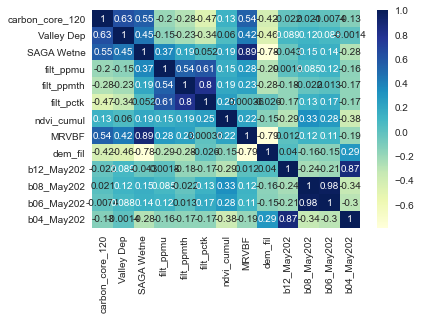

,carbon_core_120,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
0,116.490513,14.32031,10.48486,1.65956,10.03549,1.72668,4.57309,4.73556,353.97830,0.1059,0.3305,0.2608,0.0587
1,85.556977,14.03293,9.64625,1.73081,9.45596,2.17398,4.38829,4.77131,353.10999,0.0953,0.2812,0.2415,0.0514
2,70.592458,16.02896,11.49505,1.73185,8.13036,1.47984,4.30663,4.88598,352.29840,0.1003,0.3458,0.2777,0.0657
3,58.054845,16.81683,9.56579,1.19400,10.69704,1.70873,3.29355,4.93530,349.56430,0.1495,0.3067,0.2547,0.1038
4,50.653173,0.00000,8.45737,1.21112,11.08436,2.17039,5.65133,1.66508,361.26563,0.0803,0.3528,0.2969,0.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,62.890943,4.24890,7.20362,0.05970,1.81132,0.38858,1.96822,2.86000,373.11362,0.1757,0.3231,0.2514,0.1350
125,44.041832,0.03326,7.90110,-0.12484,2.54308,0.39546,1.83727,0.33945,368.99564,0.1629,0.2880,0.2559,0.1142
126,67.418635,6.20087,7.60658,0.13383,1.17750,0.17946,1.95951,2.82168,369.74094,0.1963,0.3387,0.2665,0.1640
127,37.320726,3.58124,7.55396,-0.15772,1.57682,0.11012,1.77436,0.46282,370.00159,0.1883,0.3232,0.2562,0.1428


In [44]:
# try the heatmap with transformed data
heatmap_df = df.drop(['carbon_core_30'], axis = 1) #', 'gamma_tds', 'gamma_k','band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( ['carbon_core_30'], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
correlated_df


In [45]:
correlated_df.describe()

,carbon_core_120,Valley Dep,SAGA Wetne,filt_ppmu,filt_ppmth,filt_pctk,ndvi_cumul,MRVBF,dem_fil,b12_May202,b08_May202,b06_May202,b04_May202
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,67.911582,10.073770,9.927267,1.237868,7.378914,1.401371,3.690093,5.165046,344.947923,0.129175,0.318165,0.258757,0.070955
std,27.809481,6.498618,1.413838,0.699533,2.507235,0.548474,1.356934,2.087795,10.424333,0.046687,0.086507,0.069155,0.035663
min,21.396603,0.000000,5.665390,-0.273550,1.084460,0.110120,1.774360,0.098930,331.374080,0.024100,0.046500,0.043500,0.008400
25%,44.041832,4.249690,9.073650,0.856140,6.416630,1.182730,2.490120,3.665060,336.629760,0.100300,0.273400,0.223100,0.047200
50%,66.494853,11.071750,10.023620,1.303710,7.625400,1.351800,3.769240,4.856270,341.357600,0.124100,0.306600,0.251600,0.075000
75%,89.604217,14.861940,11.074280,1.786980,9.288890,1.690420,4.388290,7.394020,350.853730,0.148800,0.357000,0.300000,0.093000
max,123.647637,25.736790,12.499680,2.610700,12.611540,2.625560,8.811020,7.940680,373.113620,0.284100,0.555600,0.461500,0.164000


array([[<AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'Valley Dep'}>,
        <AxesSubplot:title={'center':'SAGA Wetne'}>,
        <AxesSubplot:title={'center':'filt_ppmu'}>],
       [<AxesSubplot:title={'center':'filt_ppmth'}>,
        <AxesSubplot:title={'center':'filt_pctk'}>,
        <AxesSubplot:title={'center':'ndvi_cumul'}>,
        <AxesSubplot:title={'center':'MRVBF'}>],
       [<AxesSubplot:title={'center':'dem_fil'}>,
        <AxesSubplot:title={'center':'b12_May202'}>,
        <AxesSubplot:title={'center':'b08_May202'}>,
        <AxesSubplot:title={'center':'b06_May202'}>],
       [<AxesSubplot:title={'center':'b04_May202'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

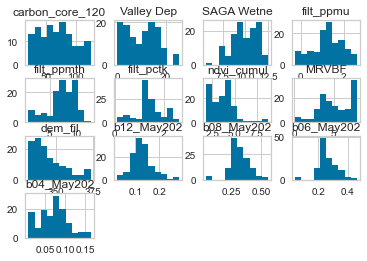

In [46]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [47]:
# Investigating drivers of Core_SOC

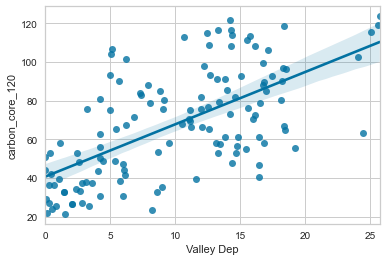

In [48]:
g = sns.regplot(x ='Valley Dep', y =  'carbon_core_120', data = Core_SOC_df)

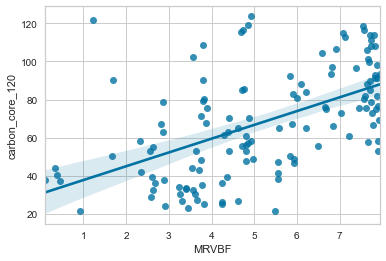

In [49]:
g = sns.regplot(x ='MRVBF', y =  'carbon_core_120', data = Core_SOC_df)

In [50]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'Valley Dep', 'SAGA Wetne',
       'filt_ppmu', 'filt_ppmth', 'filt_pctk', 'ndvi_cumul', 'MRVBF',
       'dem_fil', 'b12_May202', 'b08_May202', 'b06_May202', 'b04_May202'],
      dtype='object')

In [51]:
from pycaret.regression import *

exp_reg = setup(df
,target='carbon_core_120'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='MORO_0-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(129, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(90, 7)"


In [52]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO - 120 cm Norm = False = R2 = 0.38
# 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,14.8369,351.0277,18.4887,0.3835,0.2829,0.2507,0.0060
lasso,Lasso Regression,15.2224,363.5410,18.6212,0.3440,0.2892,0.2617,0.0060
rf,Random Forest Regressor,14.9155,365.6285,18.5938,0.3289,0.2928,0.2573,0.0790
en,Elastic Net,16.1999,392.2152,19.5092,0.3163,0.3079,0.2903,0.0060
et,Extra Trees Regressor,14.7210,360.3055,18.3868,0.3069,0.2914,0.2562,0.0640
br,Bayesian Ridge,15.4064,378.2649,18.9360,0.3040,0.2910,0.2627,0.0060
ridge,Ridge Regression,15.4166,380.5450,18.9387,0.2954,0.2919,0.2613,0.0060
lar,Least Angle Regression,15.4398,381.6358,18.9541,0.2925,0.2926,0.2616,0.0150
lr,Linear Regression,15.4398,381.6359,18.9541,0.2925,0.2926,0.2616,0.0230
par,Passive Aggressive Regressor,16.7315,440.9615,20.1460,0.2702,0.3223,0.2809,0.0160


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [53]:
model = create_model('knn') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11.8196,224.2595,14.9753,0.7185,0.1944,0.1629
1,15.2111,381.6593,19.5361,0.3428,0.3419,0.2917
2,17.8956,464.7719,21.5586,0.4338,0.3457,0.3492
3,15.6075,356.6039,18.8840,0.5775,0.3798,0.3213
4,19.7038,574.5912,23.9706,0.5311,0.3027,0.2372
5,14.4788,367.8221,19.1787,-0.6717,0.3131,0.3200
6,12.6221,293.0852,17.1197,0.6624,0.3077,0.2693
7,12.2641,235.0364,15.3309,0.3717,0.1941,0.1499
8,12.1834,189.6467,13.7712,0.5404,0.1687,0.1470
9,16.5829,422.8007,20.5621,0.3288,0.2805,0.2580


In [54]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations gives better model tuning

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.5632,150.9848,12.2876,0.8105,0.1761,0.1605
1,13.8513,293.6332,17.1357,0.4944,0.3199,0.2853
2,19.0471,484.1519,22.0035,0.4102,0.3649,0.3822
3,16.2757,338.5999,18.4011,0.5988,0.3869,0.3445
4,21.0980,619.6876,24.8935,0.4943,0.3360,0.2712
5,13.4508,321.8218,17.9394,-0.4626,0.3054,0.3053
6,12.3283,233.6898,15.2869,0.7308,0.2525,0.2320
7,11.4449,195.1828,13.9708,0.4782,0.1699,0.1429
8,10.8911,141.8520,11.9102,0.6562,0.1542,0.1393
9,15.0089,426.2633,20.6461,0.3233,0.2672,0.2240


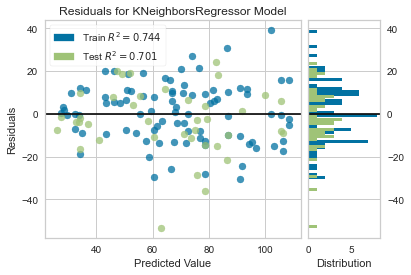

In [55]:
tuned = tuned_model
plot_model(tuned)

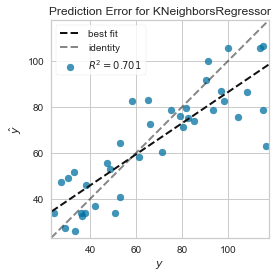

In [56]:
plot_model(tuned, plot = 'error')

In [57]:
plot_model(tuned, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [58]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
from pycaret.regression import *

exp_reg = setup(df
,target='carbon_core_120'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='MORO_0-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(129, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(90, 7)"


In [61]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO - 120 cm Norm = False = R2 = 0.38
# MORO - 120 cm Norm = True = R2 = 0.47

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,14.7130,336.8640,17.9137,0.4671,0.2798,0.2528,0.0080
lasso,Lasso Regression,14.6598,337.3065,17.8710,0.3897,0.2767,0.2511,0.0080
huber,Huber Regressor,14.6919,352.8051,18.1974,0.3676,0.2905,0.2501,0.0150
en,Elastic Net,15.8189,365.4845,18.8047,0.3623,0.2977,0.2837,0.0210
br,Bayesian Ridge,14.8604,347.5537,18.1401,0.3615,0.2819,0.2562,0.0060
ridge,Ridge Regression,14.7477,349.9753,18.1511,0.3516,0.2850,0.2538,0.0080
lr,Linear Regression,14.7296,351.0610,18.1695,0.3486,0.2861,0.2534,0.0210
lar,Least Angle Regression,14.7296,351.0610,18.1695,0.3486,0.2861,0.2534,0.0070
et,Extra Trees Regressor,14.5181,346.3348,17.9778,0.3392,0.2903,0.2537,0.0880
rf,Random Forest Regressor,14.7900,360.5058,18.4241,0.3386,0.2935,0.2579,0.0980


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
model = create_model('knn') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.8848,184.4363,13.5807,0.7685,0.1740,0.1546
1,15.7098,344.7170,18.5666,0.4064,0.3367,0.3060
2,17.0752,417.8657,20.4418,0.4909,0.3297,0.3363
3,15.7318,354.7699,18.8353,0.5796,0.3806,0.3262
4,21.4992,650.6350,25.5075,0.4691,0.3368,0.2835
5,10.4229,186.7811,13.6668,0.1511,0.2370,0.2296
6,14.1289,316.1393,17.7803,0.6358,0.3359,0.3073
7,12.3273,217.4266,14.7454,0.4188,0.1928,0.1567
8,11.5591,172.5959,13.1376,0.5817,0.1599,0.1399
9,17.7907,523.2729,22.8752,0.1693,0.3149,0.2878


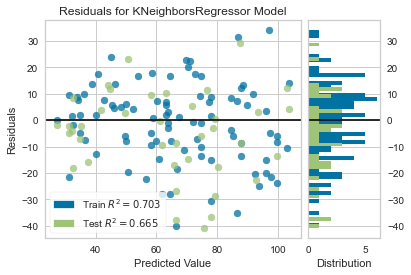

In [63]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
tuned = tuned_model
plot_model(tuned)
